In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import DistanceMetric
from sklearn.cluster import KMeans
import squarify
from kmodes.kprototypes import KPrototypes

In [2]:
train = pd.read_csv("./crime/crime/train.csv")

In [3]:
train.head()

Dates        Category                      Descript  \
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  37.800873  
4 -122.438738  37.771541

In [4]:
test = pd.read_csv("./crime/crime/test.csv")

In [5]:
test.head()

Id                Dates DayOfWeek PdDistrict                   Address  \
0   0  2015-05-10 23:59:00    Sunday    BAYVIEW   2000 Block of THOMAS AV   
1   1  2015-05-10 23:51:00    Sunday    BAYVIEW        3RD ST / REVERE AV   
2   2  2015-05-10 23:50:00    Sunday   NORTHERN    2000 Block of GOUGH ST   
3   3  2015-05-10 23:45:00    Sunday  INGLESIDE  4700 Block of MISSION ST   
4   4  2015-05-10 23:45:00    Sunday  INGLESIDE  4700 Block of MISSION ST   

            X          Y  
0 -122.399588  37.735051  
1 -122.391523  37.732432  
2 -122.426002  37.792212  
3 -122.437394  37.721412  
4 -122.437394  37.721412

c:\users\arjun\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


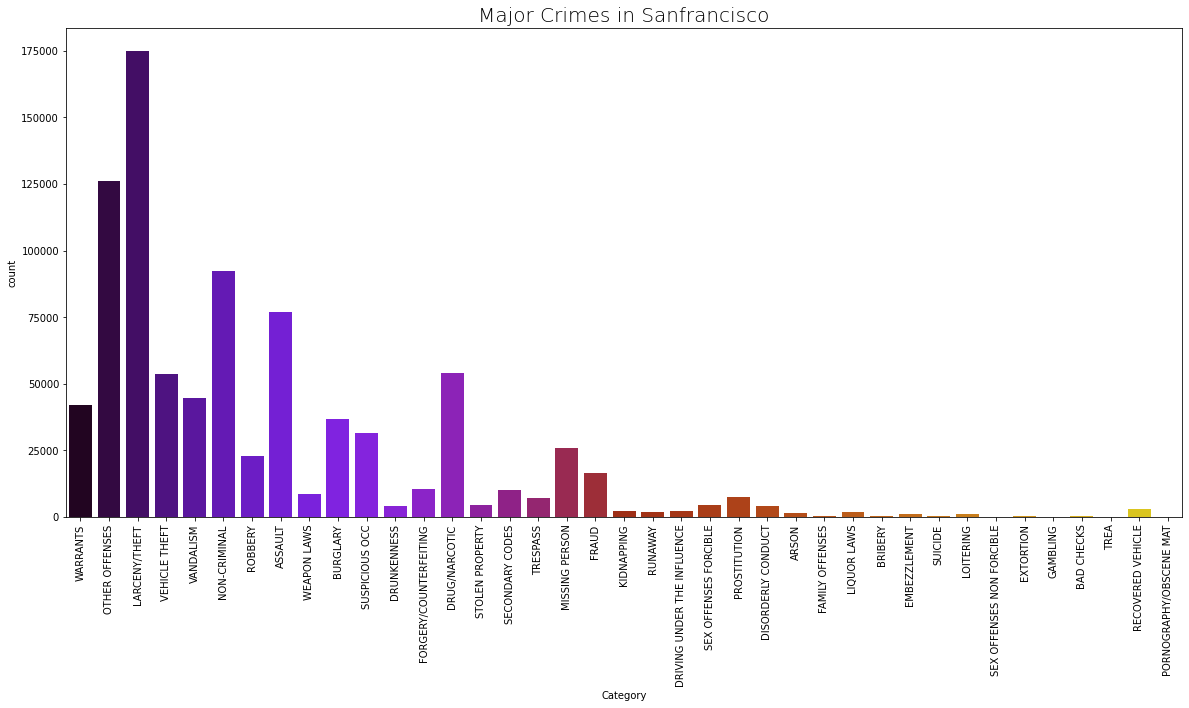

In [6]:
plt.rcParams['figure.figsize'] = (20, 9)

sns.countplot(train['Category'], palette = 'gnuplot')

plt.title('Major Crimes in Sanfrancisco', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

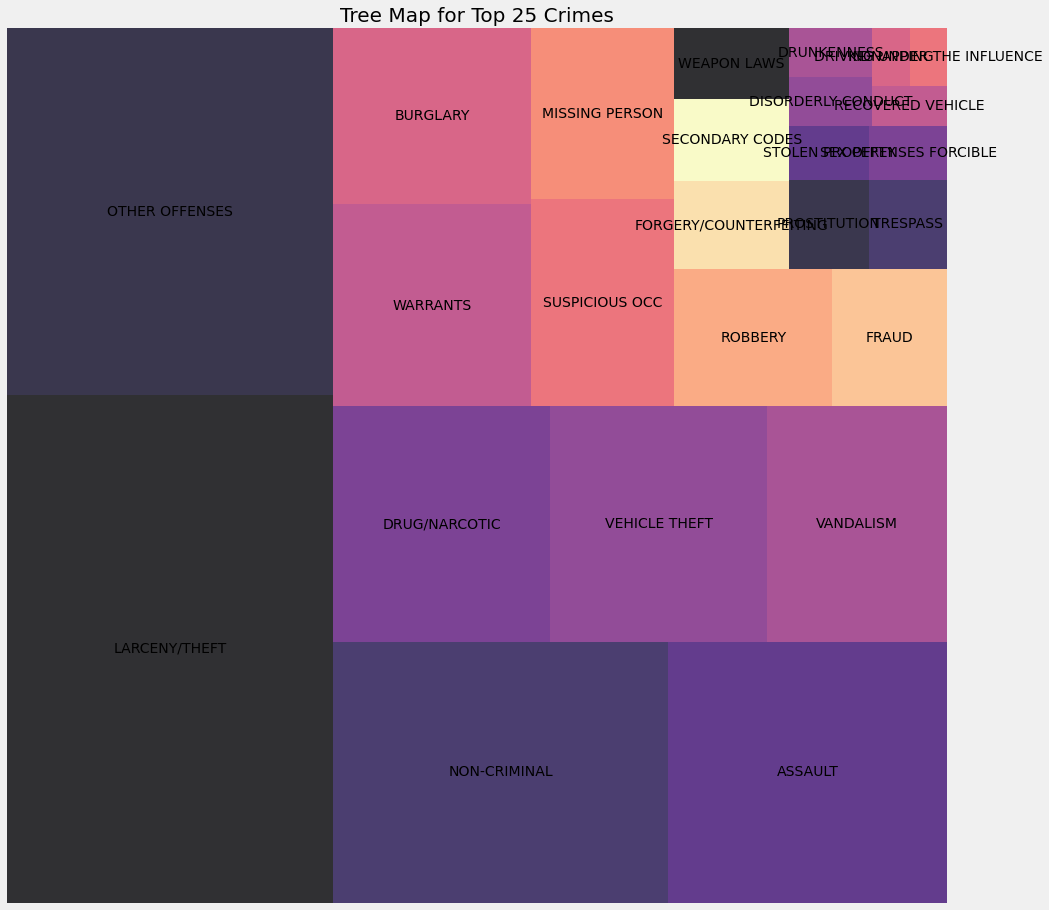

In [7]:
y = train['Category'].value_counts().head(25)
    
plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('fivethirtyeight')

color = plt.cm.magma(np.linspace(0, 1, 15))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Top 25 Crimes', fontsize = 20)

plt.axis('off')
plt.show()

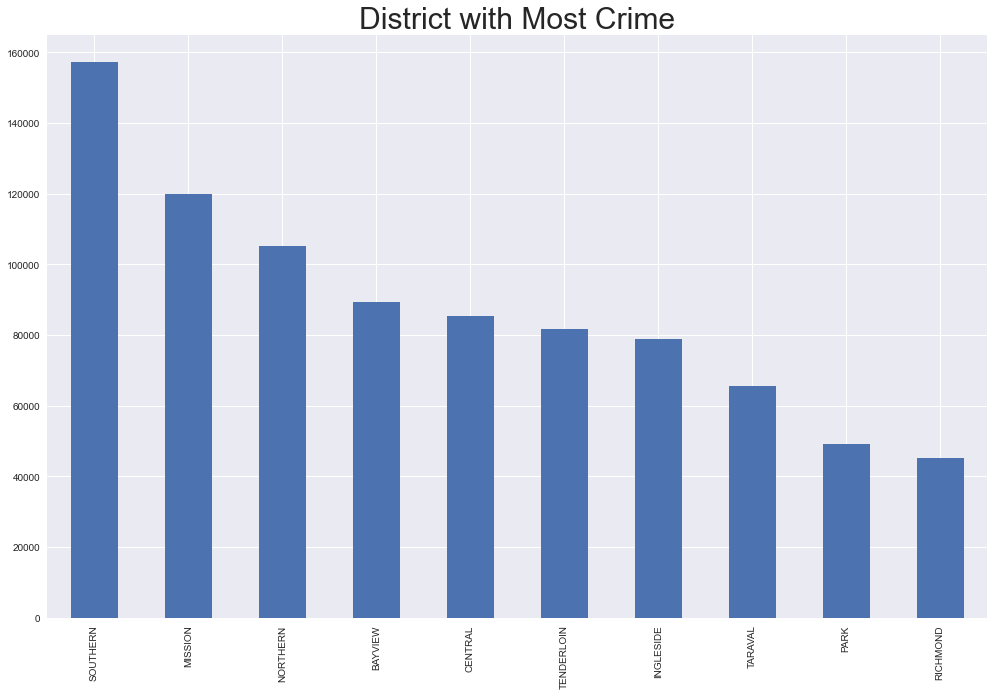

In [8]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('seaborn')

train['PdDistrict'].value_counts().plot.bar(figsize = (15, 10))

plt.title('District with Most Crime',fontsize = 30)

plt.xticks(rotation = 90)
plt.show()

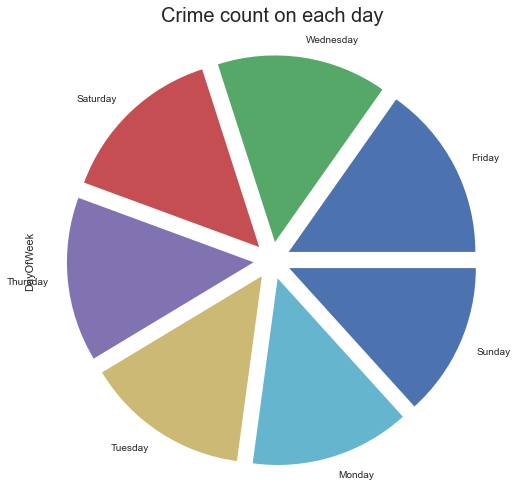

In [9]:
plt.style.use('seaborn')


train['DayOfWeek'].value_counts().head(15).plot.pie(figsize = (15, 8), explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1))

plt.title('Crime count on each day',fontsize = 20)

plt.xticks(rotation = 90)
plt.show()

In [10]:
train.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

In [11]:
test.isnull().sum()

Id            0
Dates         0
DayOfWeek     0
PdDistrict    0
Address       0
X             0
Y             0
dtype: int64

In [12]:
train.head()

Dates        Category                      Descript  \
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  37.800873  
4 -122.438738  37.771541

In [13]:
descript_labels = (list(set(train["Descript"])))
DayOfWeek_labels = (list(set(train["DayOfWeek"])))
PdDistrict_labels = (list(set(train["PdDistrict"])))
Resolution_labels = (list(set(train["Resolution"])))
Address_labels = (list(set(train["Address"])))

In [14]:
descript_labels

['FIRE REPORT',
 'SAFE BURGLARY OF A WAREHOUSE',
 'MONEY OFFENSE RELATED TO NARCOTICS TRAFFICKING',
 'FORGERY & COUNTERFEITING (GENERAL)',
 'FIREARM, POSSESSION OF WHILE WEARING MASK',
 'ROBBERY OF A BANK WITH BODILY FORCE',
 'WEAPONS POSSESSION BY JUVENILE SUSPECT',
 'BURGLARY, HOT PROWL, FORCIBLE ENTRY',
 'PHONE CALLS IN VIOLATION OF DV COURT ORDER',
 'SWITCHBLADE KNIFE, POSSESSION',
 'SALES COCAINE BASE/SCHOOLYARD TRAFFICKING ACT VIO',
 'DRUG OFFENDER, PRESENCE  NEAR SCHOOL GROUNDS',
 'AUDIOVISUAL (VIDEO OR SOUND) RECORDINGS, UNAUTHORIZED',
 'PETTY THEFT FROM LOCKED AUTO',
 'BURGLARY OF WAREHOUSE, FORCIBLE ENTRY',
 'FAILURE TO HEED RED LIGHT AND SIREN',
 'ACCESS CARD INFORMATION, PUBLICATION OF',
 'VIOLATION OF PARK CODE',
 'BURGLARY,HOTEL UNDER CONSTRUCTION, UNLAWFUL ENTRY',
 'HYPODERMIC NEEDLE OR SYRINGE, POSSESSION',
 'PUTTING SLUGS IN TELEPHONE BOX',
 'MAYHEM WITH BODILY FORCE',
 'FIREARM, CARRYING LOADED WITH INTENT TO COMMIT FELONY',
 'LOITERING ABOUT SCHOOL/PLAYGROUND',
 'PAR

In [15]:
DayOfWeek_labels

['Monday', 'Saturday', 'Tuesday', 'Sunday', 'Wednesday', 'Thursday', 'Friday']

In [16]:
PdDistrict_labels

['RICHMOND',
 'TENDERLOIN',
 'BAYVIEW',
 'INGLESIDE',
 'CENTRAL',
 'TARAVAL',
 'MISSION',
 'NORTHERN',
 'PARK',
 'SOUTHERN']

In [17]:
Resolution_labels

['PSYCHOPATHIC CASE',
 'NOT PROSECUTED',
 'JUVENILE CITED',
 'JUVENILE DIVERTED',
 'JUVENILE BOOKED',
 'ARREST, CITED',
 'ARREST, BOOKED',
 'UNFOUNDED',
 'EXCEPTIONAL CLEARANCE',
 'LOCATED',
 'JUVENILE ADMONISHED',
 'PROSECUTED FOR LESSER OFFENSE',
 'PROSECUTED BY OUTSIDE AGENCY',
 'COMPLAINANT REFUSES TO PROSECUTE',
 'NONE',
 'CLEARED-CONTACT JUVENILE FOR MORE INFO',
 'DISTRICT ATTORNEY REFUSES TO PROSECUTE']

In [18]:
Address_labels

['GAMBIER ST / BURROWS ST',
 '400 Block of LAIDLEY ST',
 'BRYANT ST / 26TH ST',
 'SAN BENITO WY / MONTEREY BL',
 '800 Block of GEARY ST',
 '4200 Block of 21ST ST',
 '19TH AV / SANTIAGO ST',
 '700 Block of BUENA VISTA WEST AV',
 '1000 Block of REVERE AV',
 'JAMESTOWN AV / JENNINGS ST',
 'FELLA PL / POWELL ST',
 '1300 Block of EVANS AV',
 'MISSION ST / LAURA ST',
 '2200 Block of 26TH ST',
 '100 Block of RICHLAND AV',
 'YORK ST / 19TH ST',
 '200 Block of POWHATTAN AV',
 '1100 Block of POLK ST',
 '2800 Block of 24TH ST',
 'GARLINGTON CT / COMMER CT',
 '0 Block of BENNINGTON ST',
 '1400 Block of JACKSON ST',
 '100 Block of DORANTES AV',
 '1600 Block of THOMAS AV',
 '1300 Block of 7TH AV',
 'NEWHALL ST / MC KINNON AV',
 'WHIPPLE AV / HURON AV',
 'RHODEISLAND ST / 16TH ST',
 'SAN JOSE AV / CESAR CHAVEZ ST',
 'BUSH ST / LAGUNA ST',
 '1100 Block of OAKDALE AV',
 'VANNESS AV / JACKSON ST',
 'VAN NESS AV / CLAY ST',
 'LINCOLN WY / 4TH AV',
 '200 Block of OAK ST',
 '15TH AV / GEARY BL',
 'PLYMOUTH

In [19]:
one_hot_encoded_data = pd.get_dummies(train, columns = ['DayOfWeek', 'PdDistrict','Resolution'])

In [20]:
one_hot_encoded_data.head()

Dates        Category                      Descript  \
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

                     Address           X          Y  DayOfWeek_Friday  \
0         OAK ST / LAGUNA ST -122.425892  37.774599                 0   
1         OAK ST / LAGUNA ST -122.425892  37.774599                 0   
2  VANNESS AV / GREENWICH ST -122.424363  37.800414                 0   
3   1500 Block of LOMBARD ST -122.426995  37.800873                 0   
4  100 Block of BRODERICK ST -122.438738  37.771541                 0   

   DayOfWeek_Monday  DayOfWeek_Saturday  DayOfWeek_Sunday  ...  \
0                 0                   0                 0  ...   
1                 0                   0                 0  ...   
2                 0                   0                 0  ...   
3                 0                   0                 0  ...   
4                 0                   0                 0  ...   

   Resolution_JUVENILE BOOKED  Resolution_JUVENILE CITED  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   

   Resolution_JUVENILE DIVERTED  Resolution_LOCATED  Resolution_NONE  \
0                             0                   0                0   
1                             0                   0                0   
2                             0                   0                0   
3                             0                   0                1   
4                             0                   0                1   

   Resolution_NOT PROSECUTED  Resolution_PROSECUTED BY OUTSIDE AGENCY  \
0                          0                                        0   
1                          0                                        0   
2                          0                                        0   
3                          0                                        0   
4                          0                                        0   

   Resolution_PROSECUTED FOR LESSER OFFENSE  Resolution_PSYCHOPATHIC CASE  \
0                                         0                             0   
1                                         0                             0   
2                                         0                             0   
3                                         0                             0   
4                                         0                             0   

   Resolution_UNFOUNDED  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 40 columns]

In [21]:
x = one_hot_encoded_data.drop(['Dates'], axis = 1)

In [22]:
x.head()

Category                      Descript                    Address  \
0        WARRANTS                WARRANT ARREST         OAK ST / LAGUNA ST   
1  OTHER OFFENSES      TRAFFIC VIOLATION ARREST         OAK ST / LAGUNA ST   
2  OTHER OFFENSES      TRAFFIC VIOLATION ARREST  VANNESS AV / GREENWICH ST   
3   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   1500 Block of LOMBARD ST   
4   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO  100 Block of BRODERICK ST   

            X          Y  DayOfWeek_Friday  DayOfWeek_Monday  \
0 -122.425892  37.774599                 0                 0   
1 -122.425892  37.774599                 0                 0   
2 -122.424363  37.800414                 0                 0   
3 -122.426995  37.800873                 0                 0   
4 -122.438738  37.771541                 0                 0   

   DayOfWeek_Saturday  DayOfWeek_Sunday  DayOfWeek_Thursday  ...  \
0                   0                 0                   0  ...   
1                   0                 0                   0  ...   
2                   0                 0                   0  ...   
3                   0                 0                   0  ...   
4                   0                 0                   0  ...   

   Resolution_JUVENILE BOOKED  Resolution_JUVENILE CITED  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   

   Resolution_JUVENILE DIVERTED  Resolution_LOCATED  Resolution_NONE  \
0                             0                   0                0   
1                             0                   0                0   
2                             0                   0                0   
3                             0                   0                1   
4                             0                   0                1   

   Resolution_NOT PROSECUTED  Resolution_PROSECUTED BY OUTSIDE AGENCY  \
0                          0                                        0   
1                          0                                        0   
2                          0                                        0   
3                          0                                        0   
4                          0                                        0   

   Resolution_PROSECUTED FOR LESSER OFFENSE  Resolution_PSYCHOPATHIC CASE  \
0                                         0                             0   
1                                         0                             0   
2                                         0                             0   
3                                         0                             0   
4                                         0                             0   

   Resolution_UNFOUNDED  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 39 columns]

In [23]:
x = one_hot_encoded_data.drop(['Category','Dates','Descript','Address'], axis = 1)

In [24]:
x.head()

X          Y  DayOfWeek_Friday  DayOfWeek_Monday  \
0 -122.425892  37.774599                 0                 0   
1 -122.425892  37.774599                 0                 0   
2 -122.424363  37.800414                 0                 0   
3 -122.426995  37.800873                 0                 0   
4 -122.438738  37.771541                 0                 0   

   DayOfWeek_Saturday  DayOfWeek_Sunday  DayOfWeek_Thursday  \
0                   0                 0                   0   
1                   0                 0                   0   
2                   0                 0                   0   
3                   0                 0                   0   
4                   0                 0                   0   

   DayOfWeek_Tuesday  DayOfWeek_Wednesday  PdDistrict_BAYVIEW  ...  \
0                  0                    1                   0  ...   
1                  0                    1                   0  ...   
2                  0                    1                   0  ...   
3                  0                    1                   0  ...   
4                  0                    1                   0  ...   

   Resolution_JUVENILE BOOKED  Resolution_JUVENILE CITED  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   

   Resolution_JUVENILE DIVERTED  Resolution_LOCATED  Resolution_NONE  \
0                             0                   0                0   
1                             0                   0                0   
2                             0                   0                0   
3                             0                   0                1   
4                             0                   0                1   

   Resolution_NOT PROSECUTED  Resolution_PROSECUTED BY OUTSIDE AGENCY  \
0                          0                                        0   
1                          0                                        0   
2                          0                                        0   
3                          0                                        0   
4                          0                                        0   

   Resolution_PROSECUTED FOR LESSER OFFENSE  Resolution_PSYCHOPATHIC CASE  \
0                                         0                             0   
1                                         0                             0   
2                                         0                             0   
3                                         0                             0   
4                                         0                             0   

   Resolution_UNFOUNDED  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 36 columns]

In [25]:
y = train["Category"]

In [26]:
y[0]

'WARRANTS'

In [48]:
train1 = train.head(1000)

In [49]:
'''Kmean = KMeans(n_clusters=39)
Kmean.fit(x)'''

'Kmean = KMeans(n_clusters=39)\nKmean.fit(x)'

In [50]:
train1

Dates        Category                       Descript  \
0    2015-05-13 23:53:00        WARRANTS                 WARRANT ARREST   
1    2015-05-13 23:53:00  OTHER OFFENSES       TRAFFIC VIOLATION ARREST   
2    2015-05-13 23:33:00  OTHER OFFENSES       TRAFFIC VIOLATION ARREST   
3    2015-05-13 23:30:00   LARCENY/THEFT   GRAND THEFT FROM LOCKED AUTO   
4    2015-05-13 23:30:00   LARCENY/THEFT   GRAND THEFT FROM LOCKED AUTO   
..                   ...             ...                            ...   
995  2015-05-11 11:00:00           FRAUD  FRAUDULENT CREDIT APPLICATION   
996  2015-05-11 11:00:00           FRAUD   CREDIT CARD, THEFT BY USE OF   
997  2015-05-11 11:00:00   LARCENY/THEFT        PETTY THEFT OF PROPERTY   
998  2015-05-11 11:00:00  MISSING PERSON               MISSING JUVENILE   
999  2015-05-11 11:00:00  MISSING PERSON                   FOUND PERSON   

     DayOfWeek PdDistrict      Resolution                    Address  \
0    Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1    Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2    Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3    Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4    Wednesday       PARK            NONE  100 Block of BRODERICK ST   
..         ...        ...             ...                        ...   
995     Monday    MISSION            NONE    400 Block of DOLORES ST   
996     Monday    MISSION            NONE    400 Block of DOLORES ST   
997     Monday   RICHMOND            NONE    3200 Block of BALBOA ST   
998     Monday  INGLESIDE            NONE     200 Block of CAYUGA AV   
999     Monday  INGLESIDE            NONE     200 Block of CAYUGA AV   

              X          Y  
0   -122.425892  37.774599  
1   -122.425892  37.774599  
2   -122.424363  37.800414  
3   -122.426995  37.800873  
4   -122.438738  37.771541  
..          ...        ...  
995 -122.426341  37.762579  
996 -122.426341  37.762579  
997 -122.493588  37.775941  
998 -122.433422  37.730390  
999 -122.433422  37.730390  

[1000 rows x 9 columns]

In [30]:
x = train1.drop(['Category','Dates','Descript','Address'], axis = 1)

In [31]:
y = one_hot_encoded_data["Category"]

In [32]:
Kmean = KMeans(n_clusters=39)
Kmean.fit(x)

KMeans(n_clusters=39)

In [33]:
print(Kmean.cluster_centers_)

[[-1.22427863e+02  3.77864141e+01  0.00000000e+00 ...  0.00000000e+00
  -1.30104261e-18 -6.93889390e-18]
 [-1.22429961e+02  3.77313949e+01  0.00000000e+00 ...  0.00000000e+00
  -4.33680869e-19  4.16666667e-02]
 [-1.22446374e+02  3.77691163e+01  0.00000000e+00 ...  0.00000000e+00
  -4.33680869e-19  0.00000000e+00]
 ...
 [-1.22441910e+02  3.77710707e+01  0.00000000e+00 ...  0.00000000e+00
   7.14285714e-02  0.00000000e+00]
 [-1.22411395e+02  3.77845387e+01  0.00000000e+00 ...  0.00000000e+00
  -4.33680869e-19 -1.73472348e-18]
 [-1.22415406e+02  3.77653636e+01  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [34]:
print(Kmean.labels_)

[24 24 24  0 36 20 20 19 27 12 12 23  9  0 19 19  9 20 32  9 20 20  9  9
  0  9  0 20 23 23  0  7  0  0  0 15  0  0 23 20 15 15  9 32 32 12 20 23
 12  2 19 19 15 15 15 15  0 15  0 12 12 12 12 15 15 23  9  9  9 15 15  0
 19 17 12 17 17 36 15  7 12  0  0  9 34 36 27 19  0 12  0  9 23 12 12 19
  7 15 19 36 36 12 33 33 33 12  0 19 19 19 19 24 27 24 12 20  9  9 15 17
 20 15  7  9 12 33  0 20 20  0 12 27  9 17  9 20 34 24 27 12 33 36 15 24
 17 20  0 33 20 19 20 15 36 12 27 19 20 20  0  0 34  9 33 33 12 36 12 19
 17 19 19  9  0  0 32  9  0  9 12  0 15 15  9 15  2  2 24 24 27 20 33 27
 17 23 24 33 33  0 34 34 34 20 19 24  9 27 27  0 20 20 23 12 12 24 33 24
 12 23 23 24  7  7  7  7  0 15  0 20 15  0 24 27  0 15 23 32 32 12 12 32
 23 19 34 34  0 27 27  0 12 20 15 36 15  0 15 12 34  0 23 12 17 17 12 15
  0 12 17 27  7  2  2  0 20 20 20 12 12 17 24 24 20  0 24 24 15 36 23 12
 24  0 12  7 17 20 36 17 17 19 17 17 15 36 12 15  9 19 27 17 27 15 27  2
 17  2 24 24 24  0  0 36 36 24 24  9 24 24 24 15 15

In [35]:
x

X          Y  DayOfWeek_Friday  DayOfWeek_Monday  \
0   -122.425892  37.774599                 0                 0   
1   -122.425892  37.774599                 0                 0   
2   -122.424363  37.800414                 0                 0   
3   -122.426995  37.800873                 0                 0   
4   -122.438738  37.771541                 0                 0   
..          ...        ...               ...               ...   
995 -122.426341  37.762579                 0                 1   
996 -122.426341  37.762579                 0                 1   
997 -122.493588  37.775941                 0                 1   
998 -122.433422  37.730390                 0                 1   
999 -122.433422  37.730390                 0                 1   

     DayOfWeek_Saturday  DayOfWeek_Sunday  DayOfWeek_Thursday  \
0                     0                 0                   0   
1                     0                 0                   0   
2                     0                 0                   0   
3                     0                 0                   0   
4                     0                 0                   0   
..                  ...               ...                 ...   
995                   0                 0                   0   
996                   0                 0                   0   
997                   0                 0                   0   
998                   0                 0                   0   
999                   0                 0                   0   

     DayOfWeek_Tuesday  DayOfWeek_Wednesday  PdDistrict_BAYVIEW  ...  \
0                    0                    1                   0  ...   
1                    0                    1                   0  ...   
2                    0                    1                   0  ...   
3                    0                    1                   0  ...   
4                    0                    1                   0  ...   
..                 ...                  ...                 ...  ...   
995                  0                    0                   0  ...   
996                  0                    0                   0  ...   
997                  0                    0                   0  ...   
998                  0                    0                   0  ...   
999                  0                    0                   0  ...   

     Resolution_JUVENILE BOOKED  Resolution_JUVENILE CITED  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   
..                          ...                        ...   
995                           0                          0   
996                           0                          0   
997                           0                          0   
998                           0                          0   
999                           0                          0   

     Resolution_JUVENILE DIVERTED  Resolution_LOCATED  Resolution_NONE  \
0                               0                   0                0   
1                               0                   0                0   
2                               0                   0                0   
3                               0                   0                1   
4                               0                   0                1   
..                            ...                 ...              ...   
995                             0                   0                1   
996                             0                   0                1   
997                             0                   0                1   
998                             0                   0                1   
999             

In [51]:
X = train1.drop(['Category','Dates','Descript','Address'], axis = 1)

In [52]:
X

DayOfWeek PdDistrict      Resolution           X          Y
0    Wednesday   NORTHERN  ARREST, BOOKED -122.425892  37.774599
1    Wednesday   NORTHERN  ARREST, BOOKED -122.425892  37.774599
2    Wednesday   NORTHERN  ARREST, BOOKED -122.424363  37.800414
3    Wednesday   NORTHERN            NONE -122.426995  37.800873
4    Wednesday       PARK            NONE -122.438738  37.771541
..         ...        ...             ...         ...        ...
995     Monday    MISSION            NONE -122.426341  37.762579
996     Monday    MISSION            NONE -122.426341  37.762579
997     Monday   RICHMOND            NONE -122.493588  37.775941
998     Monday  INGLESIDE            NONE -122.433422  37.730390
999     Monday  INGLESIDE            NONE -122.433422  37.730390

[1000 rows x 5 columns]

In [53]:
X.isnull().sum()

DayOfWeek     0
PdDistrict    0
Resolution    0
X             0
Y             0
dtype: int64

In [54]:
mark_array=X.values
mark_array

array([['Wednesday', 'NORTHERN', 'ARREST, BOOKED', -122.425891675136,
        37.7745985956747],
       ['Wednesday', 'NORTHERN', 'ARREST, BOOKED', -122.425891675136,
        37.7745985956747],
       ['Wednesday', 'NORTHERN', 'ARREST, BOOKED', -122.42436302145,
        37.8004143219856],
       ...,
       ['Monday', 'RICHMOND', 'NONE', -122.493588244515,
        37.7759407137274],
       ['Monday', 'INGLESIDE', 'NONE', -122.433421886296,
        37.730389712345904],
       ['Monday', 'INGLESIDE', 'NONE', -122.433421886296,
        37.730389712345904]], dtype=object)

In [58]:
mark_array[:, 1] = mark_array[:, 3].astype(float)
mark_array[:, 3] = mark_array[:, 4].astype(float)

In [59]:
X

DayOfWeek PdDistrict      Resolution           X          Y
0    Wednesday   NORTHERN  ARREST, BOOKED -122.425892  37.774599
1    Wednesday   NORTHERN  ARREST, BOOKED -122.425892  37.774599
2    Wednesday   NORTHERN  ARREST, BOOKED -122.424363  37.800414
3    Wednesday   NORTHERN            NONE -122.426995  37.800873
4    Wednesday       PARK            NONE -122.438738  37.771541
..         ...        ...             ...         ...        ...
995     Monday    MISSION            NONE -122.426341  37.762579
996     Monday    MISSION            NONE -122.426341  37.762579
997     Monday   RICHMOND            NONE -122.493588  37.775941
998     Monday  INGLESIDE            NONE -122.433422  37.730390
999     Monday  INGLESIDE            NONE -122.433422  37.730390

[1000 rows x 5 columns]

In [60]:
mark_array[0]

array(['Wednesday', -122.425891675136, 'ARREST, BOOKED', 37.7745985956747,
       37.7745985956747], dtype=object)

In [62]:
kproto = KPrototypes(n_clusters=39, verbose=2,max_iter=20)
clusters = kproto.fit_predict(mark_array, categorical=[0, 1, 2])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 490, ncost: 11.820305303299774
Run: 1, iteration: 2/20, moves: 128, ncost: 11.795090037369894
Run: 1, iteration: 3/20, moves: 50, ncost: 11.793424305719933
Run: 1, iteration: 4/20, moves: 41, ncost: 11.79097455569408
Run: 1, iteration: 5/20, moves: 44, ncost: 11.72803998231622
Run: 1, iteration: 6/20, moves: 31, ncost: 11.714913326388723
Run: 1, iteration: 7/20, moves: 9, ncost: 11.714693406424749
Run: 1, iteration: 8/20, moves: 2, ncost: 11.71468512685877
Run: 1, iteration: 9/20, moves: 0, ncost: 11.71468512685877
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 424, ncost: 12.591280384360509
Run: 2, iteration: 2/20, moves: 198, ncost: 11.667363768037768
Run: 2, iteration: 3/20, moves: 136, ncost: 11.641082624869316
Run: 2, iteration: 4/20, moves: 57, ncost: 11.638272913924673
Run: 2, iteration: 5/20, moves: 25, 

In [63]:
print(kproto.cluster_centroids_)

[['37.775536197263946' '37.775536197263946' 'Wednesday'
  '-122.40340479147899' 'NONE']
 ['37.7638379499564' '37.7638379499564' 'Tuesday' '-122.395106891925'
  'NONE']
 ['37.7580842533375' '37.7580842533375' 'Monday' '-122.40340479147899'
  'NONE']
 ['37.76599365596217' '37.76599365596217' 'Wednesday' '-122.419515708406'
  'ARREST, BOOKED']
 ['37.76595201286589' '37.76595201286589' 'Tuesday' '-122.40611462810499'
  'ARREST, BOOKED']
 ['37.76858337379202' '37.76858337379202' 'Monday' '-122.41127918996901'
  'UNFOUNDED']
 ['37.7466095588895' '37.7466095588895' 'Tuesday' '-122.42249041028'
  'NONE']
 ['37.7643034837264' '37.7643034837264' 'Wednesday' '-122.41967661615'
  'NONE']
 ['37.78187850374174' '37.78187850374174' 'Wednesday' '-122.412249767634'
  'NONE']
 ['37.7209766476223' '37.7209766476223' 'Tuesday' '-122.45561586153799'
  'NONE']
 ['37.752246444028025' '37.752246444028025' 'Wednesday'
  '-122.48289869410601' 'NONE']
 ['37.72137425968859' '37.72137425968859' 'Wednesday'
  '-122

In [64]:
cluster_dict=[]
for c in clusters:
    cluster_dict.append(c)

In [67]:
cluster_dict[0]

3

In [71]:
train1['cluster'] = cluster_dict

C:\Users\arjun\AppData\Local\Temp/ipykernel_14116/978006681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1['cluster'] = cluster_dict


In [73]:
train1.head(5)

Dates        Category                      Descript  \
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  cluster  
0 -122.425892  37.774599        3  
1 -122.425892  37.774599        3  
2 -122.424363  37.800414        3  
3 -122.426995  37.800873       29  
4 -122.438738  37.771541       23

In [74]:
train1[train1['cluster']== 0].head(10)

Dates       Category  \
100  2015-05-13 18:00:00  LARCENY/THEFT   
118  2015-05-13 17:35:00   NON-CRIMINAL   
141  2015-05-13 16:42:00  LARCENY/THEFT   
147  2015-05-13 16:20:00  LARCENY/THEFT   
190  2015-05-13 14:30:00       WARRANTS   
225  2015-05-13 13:05:00  LARCENY/THEFT   
303  2015-05-13 07:30:00  VEHICLE THEFT   
308  2015-05-13 07:00:00       BURGLARY   
309  2015-05-13 06:45:00       BURGLARY   
446  2015-05-12 19:00:00  LARCENY/THEFT   

                                        Descript  DayOfWeek PdDistrict  \
100                 GRAND THEFT FROM LOCKED AUTO  Wednesday       PARK   
118                                   AIDED CASE  Wednesday   SOUTHERN   
141                 GRAND THEFT FROM LOCKED AUTO  Wednesday       PARK   
147                  PETTY THEFT FROM A BUILDING  Wednesday   SOUTHERN   
190                               WARRANT ARREST  Wednesday   SOUTHERN   
225               GRAND THEFT FROM UNLOCKED AUTO  Wednesday   SOUTHERN   
303                            STOLEN AUTOMOBILE  Wednesday   SOUTHERN   
308  BURGLARY OF APARTMENT HOUSE, UNLAWFUL ENTRY  Wednesday   RICHMOND   
309          BURGLARY, HOT PROWL, UNLAWFUL ENTRY  Wednesday   SOUTHERN   
446               GRAND THEFT FROM UNLOCKED AUTO    Tuesday   SOUTHERN   

         Resolution                       Address           X          Y  \
100            NONE           COLE ST / FULTON ST -122.451360  37.775174   
118            NONE      1300 Block of MISSION ST -122.415658  37.775392   
141            NONE       2100 Block of FULTON ST -122.450556  37.775335   
147  ARREST, BOOKED        800 Block of BRYANT ST -122.403405  37.775421   
190  ARREST, BOOKED        800 Block of BRYANT ST -122.403405  37.775421   
225            NONE        800 Block of BRYANT ST -122.403405  37.775421   
303            NONE          0 Block of RAUSCH ST -122.409775  37.776444   
308            NONE  100 Block of SUTROHEIGHTS AV -122.508632  37.776069   
309            NONE       100 Block of LANGTON ST -122.407389  37.775611   
446            NONE        800 Block of BRYANT ST -122.403405  37.775421   

     cluster  
100        0  
118        0  
141        0  
147        0  
190        0  
225        0  
303        0  
308        0  
309        0  
446        0

In [75]:
train1[train1['cluster']== 10].head(10)

Dates        Category  \
169  2015-05-13 15:22:00    NON-CRIMINAL   
170  2015-05-13 15:22:00         ASSAULT   
192  2015-05-13 14:27:00    NON-CRIMINAL   
217  2015-05-13 13:30:00   LARCENY/THEFT   
218  2015-05-13 13:30:00       VANDALISM   
258  2015-05-13 10:30:00  SUSPICIOUS OCC   
295  2015-05-13 08:00:00  OTHER OFFENSES   
296  2015-05-13 08:00:00         ASSAULT   
345  2015-05-13 02:00:00   VEHICLE THEFT   

                                              Descript  DayOfWeek PdDistrict  \
169                                   TRAFFIC ACCIDENT  Wednesday    BAYVIEW   
170  SHOOTING INTO INHABITED DWELLING OR OCCUPIED V...  Wednesday    BAYVIEW   
192                       AIDED CASE, MENTAL DISTURBED  Wednesday    MISSION   
217                       GRAND THEFT FROM LOCKED AUTO  Wednesday    TARAVAL   
218          MALICIOUS MISCHIEF, VANDALISM OF VEHICLES  Wednesday    TARAVAL   
258                              SUSPICIOUS OCCURRENCE  Wednesday    TARAVAL   
295                         INCIDENT ON SCHOOL GROUNDS  Wednesday    MISSION   
296                                            BATTERY  Wednesday    MISSION   
345                                  STOLEN AUTOMOBILE  Wednesday    TARAVAL   

    Resolution                       Address           X          Y  cluster  
169       NONE  1200 Block of CONNECTICUT ST -122.396270  37.750453       10  
170       NONE  1200 Block of CONNECTICUT ST -122.396270  37.750453       10  
192       NONE         3100 Block of 24TH ST -122.414634  37.752528       10  
217       NONE          25TH AV / NORIEGA ST -122.482899  37.753955       10  
218       NONE          25TH AV / NORIEGA ST -122.482899  37.753955       10  
258       NONE         1800 Block of 29TH AV -122.487186  37.752815       10  
295       NONE           24TH ST / FOLSOM ST -122.414089  37.752505       10  
296       NONE           24TH ST / FOLSOM ST -122.414089  37.752505       10  
345       NONE           47TH AV / ORTEGA ST -122.506347  37.751050       10

In [76]:
train1[train1['cluster']== 20].head(10)

Dates       Category                      Descript  \
41   2015-05-13 20:15:00  LARCENY/THEFT  PETTY THEFT FROM LOCKED AUTO   
112  2015-05-13 17:45:00  LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
138  2015-05-13 16:46:00  LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
188  2015-05-13 14:30:00  LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
202  2015-05-13 14:00:00   NON-CRIMINAL                FOUND PROPERTY   
205  2015-05-13 14:00:00  LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
251  2015-05-13 11:40:00   NON-CRIMINAL                FOUND PROPERTY   

     DayOfWeek PdDistrict Resolution                       Address  \
41   Wednesday   SOUTHERN       NONE       1600 Block of MARKET ST   
112  Wednesday   RICHMOND       NONE  500 Block of JOHNFKENNEDY DR   
138  Wednesday   RICHMOND       NONE  500 Block of JOHNFKENNEDY DR   
188  Wednesday   RICHMOND       NONE  400 Block of JOHNFKENNEDY DR   
202  Wednesday    BAYVIEW       NONE          1200 Block of 3RD ST   
205  Wednesday   RICHMOND       NONE  400 Block of JOHNFKENNEDY DR   
251  Wednesday       PARK       NONE          900 Block of PAGE ST   

              X          Y  cluster  
41  -122.422128  37.773033       20  
112 -122.466205  37.772541       20  
138 -122.466205  37.772541       20  
188 -122.465209  37.772610       20  
202 -122.389518  37.772468       20  
205 -122.465209  37.772610       20  
251 -122.436404  37.772255       20